In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means

%matplotlib inline

In [3]:
# Load the data
csv_file = pd.read_csv("artist_matrix.csv")

In [4]:
csv_file.head()

,Unnamed: 0,x_coord,y_coord
0,#####,12.685204,6.673776
1,12 Stones,-17.262379,-0.056105
2,1200 Micrograms,7.684534,11.154464
3,12012,-14.733164,-15.623535
4,13th Floor Elevators,-1.986131,-20.267014


In [5]:
csv_file.rename(columns={"Unnamed: 0":"artist"}, inplace=True)

In [6]:
csv1=csv_file.drop('artist', axis=1)

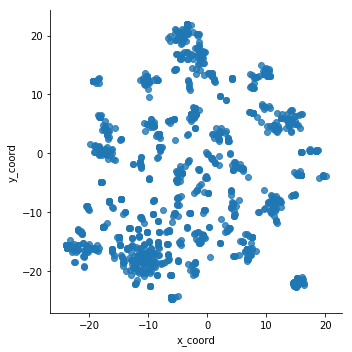

In [7]:
sns.lmplot(x='x_coord', y='y_coord', data=csv_file, fit_reg=False)

In [8]:
# Creating the pipeline and selecting the clusters
k_means = make_pipeline( KMeans(n_clusters=25, random_state=123))

In [9]:
# Fitting the model
k_means.fit(csv1)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [10]:
# Add the predict model
csv1['cluster'] = k_means.predict(csv1)

In [11]:
# Check the clusters
csv1.head()

,x_coord,y_coord,cluster
0,12.685204,6.673776,12
1,-17.262379,-0.056105,4
2,7.684534,11.154464,17
3,-14.733164,-15.623535,0
4,-1.986131,-20.267014,5


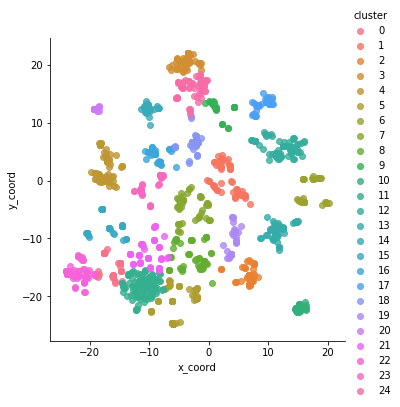

In [12]:
# Plotting the Clusters

py=plt.rcParams['figure.figsize']=15,5
py=sns.lmplot(x='x_coord', y='y_coord', hue='cluster', data=csv1, fit_reg=False)
py.savefig("25_clusters.png");

In [13]:
# Finding the number of artists per each cluster
csv1['cluster'].value_counts()

11    118
12     86
4      78
22     73
8      70
5      67
7      65
1      64
13     61
3      61
24     60
21     54
6      53
2      52
18     44
19     44
15     43
17     43
0      43
16     40
10     38
14     36
23     31
9      29
20     17
Name: cluster, dtype: int64

In [14]:
# filtering out the clusters
csv_file[csv1['cluster']== 18][0:10]

,artist,x_coord,y_coord
5,2Pac,-2.027696,6.453874
12,50 Cent,-2.182877,6.568890
16,A Tribe Called Quest,-1.991294,4.329634
45,Akon,-3.034086,11.050028
115,Audio Bullys,-2.685928,5.425065
126,B.o.B,-1.814330,6.621189
161,Black Milk,-2.753530,6.654275
226,Chamillionaire,-1.812472,6.621224
239,Chingy,-2.138746,7.641724
242,Chris Brown,-2.120280,7.693084


In [15]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(csv1[['x_coord','y_coord']], csv1['cluster'])

0.5322361289743444